In [28]:
#!pip install pmdarima

     |████████████████████████████████| 1.1MB 864kB/s eta 0:00:01
     |████████████████████████████████| 15.1MB 12.0MB/s eta 0:00:01
     |████████████████████████████████| 8.4MB 28.6MB/s eta 0:00:01     |██████████▍                     | 2.8MB 28.6MB/s eta 0:00:01
  Created wheel for pmdarima: filename=pmdarima-1.5.3-cp37-cp37m-macosx_10_9_x86_64.whl size=600312 sha256=c016a8649125de1044a5a9ceafecdecd7d961174b96f62d622a4037947121f6b
  Stored in directory: /Users/trevohearn/Library/Caches/pip/wheels/fa/fe/62/f131813877a7bec01bf2b4805ba2639d04b03e5b33e313f5b4
Successfully built pmdarima
  Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled numpy-1.17.2
  Found existing installation: statsmodels 0.10.1
    Uninstalling statsmodels-0.10.1:
      Successfully uninstalled statsmodels-0.10.1


# Imports

In [4]:
#imports

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
#pmdarima
from pmdarima import auto_arima 
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('four_year_w_difference.csv')
df_test = pd.read_csv('test_df_w_timeshift.csv')
df['Date_IntervalStart'] = pd.to_datetime(df['Date_IntervalStart'])
df_test['Date_IntervalStart'] = pd.to_datetime(df_test['Date_IntervalStart'])
df.set_index('Date_IntervalStart', inplace = True)
df_test.set_index('Date_IntervalStart', inplace = True)
df.head(20)

,TotalVolumetime_shift,TotalVolume,day_of_week,week_diff,year_diff,year_and_week_diff,week_and_2month_diff
Date_IntervalStart,,,,,,,
2015-07-08 00:00:00,19.0,25,2,6.0,NaN,NaN,NaN
2015-07-08 01:00:00,16.0,16,2,0.0,NaN,NaN,NaN
2015-07-08 02:00:00,11.0,13,2,2.0,NaN,NaN,NaN
2015-07-08 03:00:00,12.0,15,2,3.0,NaN,NaN,NaN
2015-07-08 04:00:00,40.0,48,2,8.0,NaN,NaN,NaN
2015-07-08 05:00:00,194.0,185,2,-9.0,NaN,NaN,NaN
2015-07-08 06:00:00,778.0,816,2,38.0,NaN,NaN,NaN
2015-07-08 07:00:00,1024.0,955,2,-69.0,NaN,NaN,NaN
2015-07-08 08:00:00,1011.0,1002,2,-9.0,NaN,NaN,NaN


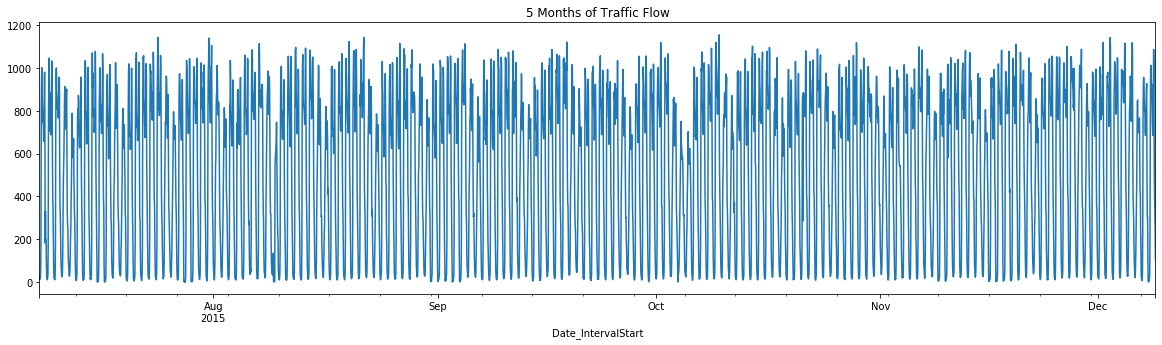

In [9]:
df['TotalVolume'].iloc[:24 * 7 * 22].plot(figsize=(20,5))
plt.title('5 Months of Traffic Flow')
plt.show()

# Resample

In [349]:
df_days = df.resample('d').sum()

In [352]:
df_days

,TotalVolumetime_shift,TotalVolume,day_of_week,week_diff,year_diff,year_and_week_diff,week_and_2month_diff,ShiftDay,ShiftWeek,DiffWeek
Date_IntervalStart,,,,,,,,,,
2015-07-08,12645.0,12097,48,-548.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-09,13138.0,12970,72,-168.0,0.0,0.0,0.0,12097.0,0.0,0.0
2015-07-10,13692.0,13109,96,-583.0,0.0,0.0,0.0,12970.0,0.0,0.0
2015-07-11,10937.0,11179,120,242.0,0.0,0.0,0.0,13109.0,0.0,0.0
2015-07-12,8486.0,8104,144,-382.0,0.0,0.0,0.0,11179.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2019-06-26,14986.0,14327,48,-659.0,119.0,778.0,636.0,13606.0,14986.0,-659.0
2019-06-27,14993.0,15197,72,204.0,1098.0,894.0,3305.0,14327.0,14993.0,204.0
2019-06-28,16323.0,16217,96,-106.0,2167.0,2273.0,2521.0,15197.0,16323.0,-106.0


In [57]:
#df_will['Date'] = pd.to_datetime(df_will['Date'] + 'T' + df_will['IntervalStart'])

str

# Methods

## clean_dfs

In [ ]:
def clean_dfs(dataframe_list, desired_vehicle):
    clean_dataframe_list = []
    cols_to_remove = ['AssetID', "FinancialQtrID", "Version", "GantryDirection", "GantryType",
                  "GantryGPSLatitude", "GantryGPSLongitude"]
    for dataframe in dataframe_list:
        dataframe.drop(columns = cols_to_remove, inplace=True)
        dataframe_only_desired_vehicle = dataframe[dataframe['VehicleClass'] == desired_vehicle]
        clean_dataframe_list.append(dataframe_only_desired_vehicle)
    return clean_dataframe_list

## isBusiness

In [456]:
def isBusiness(x, morning=6, evening=19):
    if x in range(morning, evening):
        return 1
    else:
        return 0

## stationarity_check

In [311]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(TS, window = 364 * 4, column = 'TotalVolume'):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=window, center=False).mean()
    roll_std = TS.rolling(window=window, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    #plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

## test_stationarity

In [25]:
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

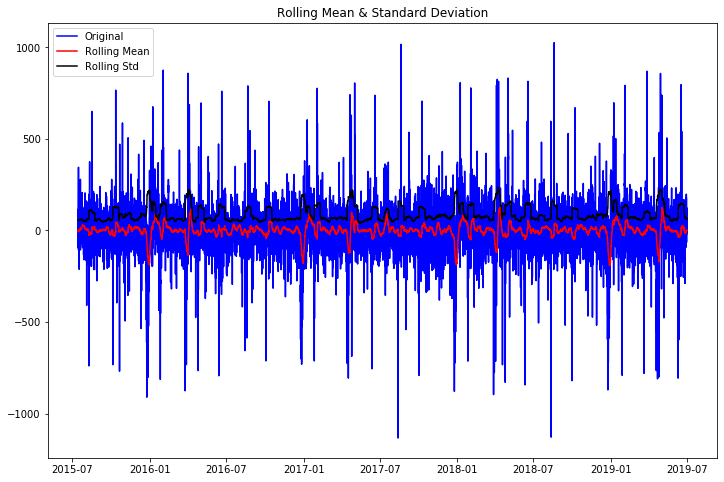

Results of Dickey-Fuller Test:
Test Statistic                -1.514189e+01
p-value                        6.991816e-28
#Lags Used                     4.900000e+01
Number of Observations Used    3.484600e+04
Critical Value (1%)           -3.430538e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64


In [312]:
test_stationarity(df['week_diff'], window=168)

# Shifts

In [104]:
df['ShiftDay'] = df['TotalVolume'].shift(periods=24)
df['ShiftWeek'] = df['TotalVolume'].shift(periods=7*24)

In [105]:
df.head(50)

,TotalVolumetime_shift,TotalVolume,day_of_week,week_diff,year_diff,year_and_week_diff,week_and_2month_diff,ShiftDay,ShiftWeek
Date_IntervalStart,,,,,,,,,
2015-07-08 00:00:00,19.0,25,2,6.0,NaN,NaN,NaN,NaN,NaN
2015-07-08 01:00:00,16.0,16,2,0.0,NaN,NaN,NaN,NaN,NaN
2015-07-08 02:00:00,11.0,13,2,2.0,NaN,NaN,NaN,NaN,NaN
2015-07-08 03:00:00,12.0,15,2,3.0,NaN,NaN,NaN,NaN,NaN
2015-07-08 04:00:00,40.0,48,2,8.0,NaN,NaN,NaN,NaN,NaN
2015-07-08 05:00:00,194.0,185,2,-9.0,NaN,NaN,NaN,NaN,NaN
2015-07-08 06:00:00,778.0,816,2,38.0,NaN,NaN,NaN,NaN,NaN
2015-07-08 07:00:00,1024.0,955,2,-69.0,NaN,NaN,NaN,NaN,NaN
2015-07-08 08:00:00,1011.0,1002,2,-9.0,NaN,NaN,NaN,NaN,NaN


In [106]:
df['DiffWeek'] = df['TotalVolume'] - df['ShiftWeek']

In [164]:
df_test['DiffWeek'] = df_test['TotalVolume'] - df_test['week_timeshift']

df_test.TotalVolume.index[0], df_test['week_timeshift'].dropna().index[0]

(Timestamp('2019-07-01 00:00:00'), Timestamp('2019-07-08 00:00:00'))

In [156]:
df_test['week_timeshift'].dropna().index[0] #2019-07-08 00:00:00

Timestamp('2019-07-08 00:00:00')

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Date_IntervalStart', length=34896)

In [431]:
df['hour'] = df.index.hour
df_test['hour'] = df_test.index.hour

In [454]:
list(range(6,19))

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [457]:
df['isBusinessHour'] = df['hour'].apply(isBusiness)
df_test['isBusinessHour'] = df_test['hour'].apply(isBusiness)

In [459]:
df.head(24)

,TotalVolumetime_shift,TotalVolume,day_of_week,week_diff,year_diff,year_and_week_diff,week_and_2month_diff,ShiftDay,ShiftWeek,DiffWeek,hour,isBusinessHour
Date_IntervalStart,,,,,,,,,,,,
2015-07-08 00:00:00,19.0,25,2,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2015-07-08 01:00:00,16.0,16,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2015-07-08 02:00:00,11.0,13,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2015-07-08 03:00:00,12.0,15,2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2015-07-08 04:00:00,40.0,48,2,8.0,NaN,NaN,NaN,NaN,NaN,NaN,4,0
2015-07-08 05:00:00,194.0,185,2,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,5,0
2015-07-08 06:00:00,778.0,816,2,38.0,NaN,NaN,NaN,NaN,NaN,NaN,6,1
2015-07-08 07:00:00,1024.0,955,2,-69.0,NaN,NaN,NaN,NaN,NaN,NaN,7,1
2015-07-08 08:00:00,1011.0,1002,2,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,8,1


# Correlation

## Auto Correlation

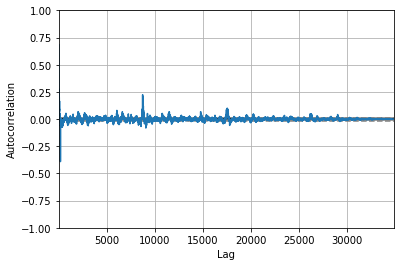

In [134]:
pd.plotting.autocorrelation_plot(df['week_diff']);

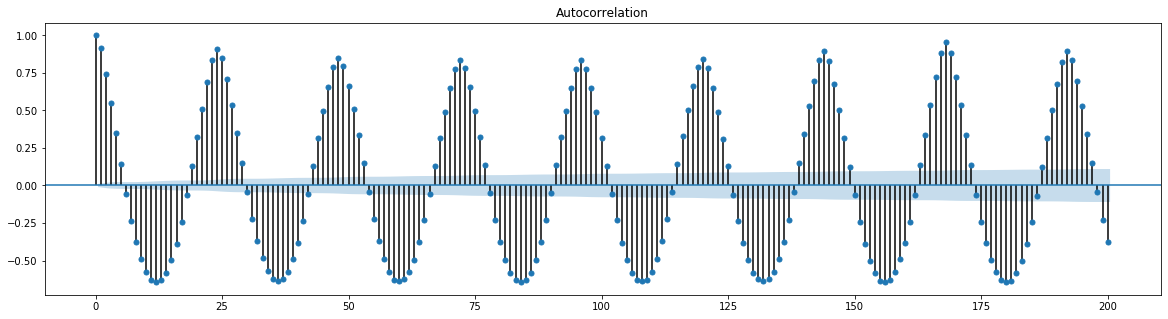

In [11]:
rcParams['figure.figsize'] = 20, 5
plot_acf(df['TotalVolume'], lags=200);

## Partial Correlation

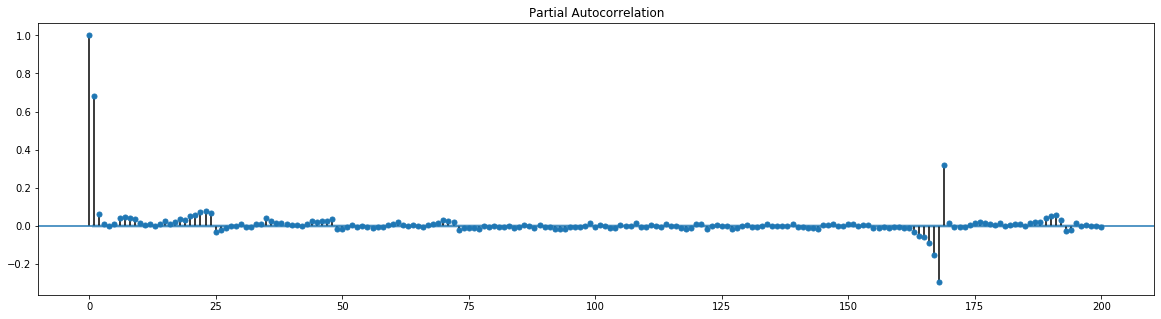

In [136]:
rcParams['figure.figsize'] = 20, 5
plot_pacf(df['week_diff'], lags=200);

# Train-Test 

# Models

## AR

In [200]:
m = AR(df['TotalVolume'])
mnolag = m.fit(method='mle', ic='aic')

In [201]:
predmnolag = mnolag.predict(start=start, end=end, dynamic=False).rename('nolag')

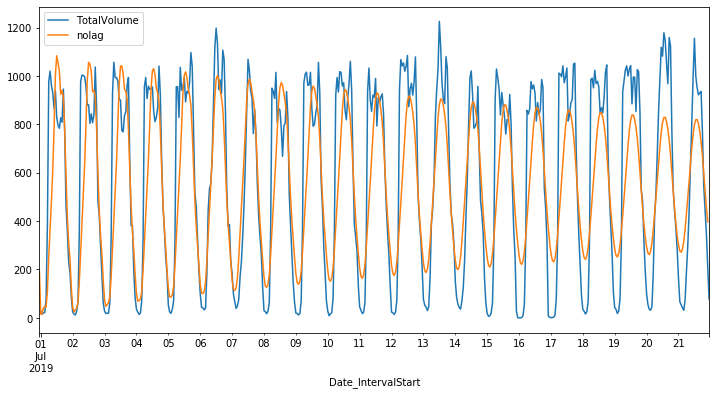

In [236]:
df_test['TotalVolume'].iloc[:24 * 21].plot(legend=True)
predmnolag.iloc[:24 * 21].plot(legend=True, figsize=(12,6));

### TotalVolume

### maxlag = 25

In [114]:
model = AR(df['TotalVolume'])
AR1fit = model.fit(maxlag=25,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 25
Coefficients:
const              68.755246
L1.TotalVolume      0.959768
L2.TotalVolume     -0.217155
L3.TotalVolume      0.030051
L4.TotalVolume     -0.034388
L5.TotalVolume      0.037075
L6.TotalVolume     -0.042163
L7.TotalVolume     -0.034172
L8.TotalVolume      0.029289
L9.TotalVolume      0.036609
L10.TotalVolume    -0.057897
L11.TotalVolume     0.002124
L12.TotalVolume     0.042616
L13.TotalVolume    -0.064105
L14.TotalVolume    -0.026916
L15.TotalVolume     0.064438
L16.TotalVolume    -0.043435
L17.TotalVolume    -0.031879
L18.TotalVolume     0.058992
L19.TotalVolume    -0.000246
L20.TotalVolume    -0.048373
L21.TotalVolume     0.032436
L22.TotalVolume    -0.046414
L23.TotalVolume     0.159755
L24.TotalVolume     0.466736
L25.TotalVolume    -0.398002
dtype: float64


In [125]:
start = df_test.index[0]
end = df_test.index[-1]
rename = 'Predictions'

predar1 = AR1fit.predict(start=start,end=end,dynamic=False).rename(rename)

In [ ]:
df[]

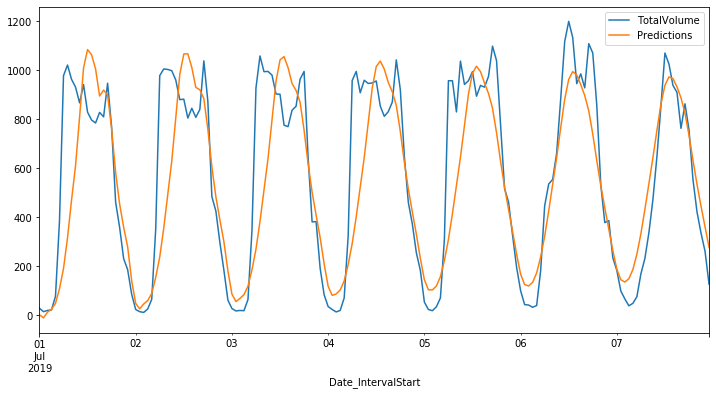

In [127]:
predar1.rename('Forecast')
#df['TotalVolume'].iloc[len(df['TotalVolume']) * 99 // 100:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
predar1.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

### week_diff

In [149]:
modelar2 = AR(df['week_diff'])
AR2fit = modelar2.fit(method='mle')

In [258]:
df_test['DiffWeek'].iloc[:24 * 7]

Date_IntervalStart
2019-07-01 00:00:00   NaN
2019-07-01 01:00:00   NaN
2019-07-01 02:00:00   NaN
2019-07-01 03:00:00   NaN
2019-07-01 04:00:00   NaN
                       ..
2019-07-07 19:00:00   NaN
2019-07-07 20:00:00   NaN
2019-07-07 21:00:00   NaN
2019-07-07 22:00:00   NaN
2019-07-07 23:00:00   NaN
Name: DiffWeek, Length: 168, dtype: float64

In [176]:
predar2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('PredictionAR2')


In [272]:
predar2.index

DatetimeIndex(['2019-07-01 00:00:00', '2019-07-01 01:00:00',
               '2019-07-01 02:00:00', '2019-07-01 03:00:00',
               '2019-07-01 04:00:00', '2019-07-01 05:00:00',
               '2019-07-01 06:00:00', '2019-07-01 07:00:00',
               '2019-07-01 08:00:00', '2019-07-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=4416, freq='H')

In [277]:
predar2[:-1].index

DatetimeIndex(['2019-07-01 00:00:00', '2019-07-01 01:00:00',
               '2019-07-01 02:00:00', '2019-07-01 03:00:00',
               '2019-07-01 04:00:00', '2019-07-01 05:00:00',
               '2019-07-01 06:00:00', '2019-07-01 07:00:00',
               '2019-07-01 08:00:00', '2019-07-01 09:00:00',
               ...
               '2019-12-31 13:00:00', '2019-12-31 14:00:00',
               '2019-12-31 15:00:00', '2019-12-31 16:00:00',
               '2019-12-31 17:00:00', '2019-12-31 18:00:00',
               '2019-12-31 19:00:00', '2019-12-31 20:00:00',
               '2019-12-31 21:00:00', '2019-12-31 22:00:00'],
              dtype='datetime64[ns]', length=4415, freq='H')

In [314]:
cumul_df = pd.Series(cumul[:-1], index=predar2.index)#.to_frame()
#cumul_df.columns = ['Cumulative']

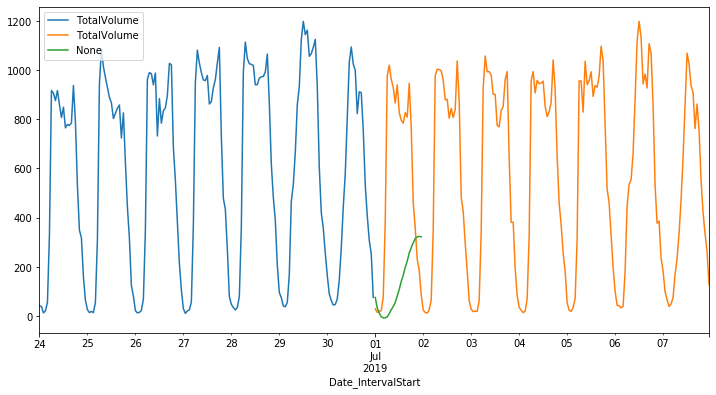

In [315]:
df['TotalVolume'].iloc[-24*7:].plot(legend=True)
df_test['TotalVolume'].iloc[:24*7].plot(legend=True)
cumul_df.iloc[:24].plot(legend=True,figsize=(12,6));

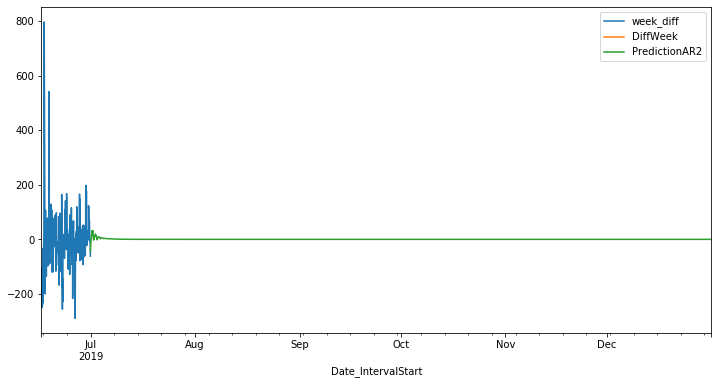

In [259]:
df['week_diff'].iloc[len(df['week_diff']) * 99 // 100:].plot(legend=True)
df_test['DiffWeek'].iloc[:24 * 7].plot(legend=True)
predar2.plot(legend=True,figsize=(12,6));

## ARMA

### order = (7,1)

In [16]:
mod_arma = ARMA(df['TotalVolume'], order=(7,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:            TotalVolume   No. Observations:                34896
Model:                     ARMA(7, 1)   Log Likelihood             -217240.610
Method:                       css-mle   S.D. of innovations            122.289
Date:                Fri, 27 Mar 2020   AIC                         434501.220
Time:                        13:14:11   BIC                         434585.821
Sample:                    07-08-2015   HQIC                        434528.172
                         - 06-30-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               549.0470      1.640    334.801      0.000     545.833     552.261
ar.L1.TotalVolume     2.0577      0.007    288.040      0.000       2.044       2.072
ar.L2.TotalVolume    -1.

In [17]:
start = df_test.index[0]
end = df_test.index[-1]
preds = res_arma.predict(start=start, end=end, dynamic=False)

In [64]:
preds.index[0]

Timestamp('2019-06-30 23:00:00', freq='H')

In [186]:
len(df['TotalVolume']) * 99 // 100 - len(df['TotalVolume'])

-349

In [452]:
df_test['TotalVolume'][6:19]

Date_IntervalStart
2019-07-01 06:00:00     977
2019-07-01 07:00:00    1020
2019-07-01 08:00:00     962
2019-07-01 09:00:00     930
2019-07-01 10:00:00     866
2019-07-01 11:00:00     940
2019-07-01 12:00:00     828
2019-07-01 13:00:00     796
2019-07-01 14:00:00     784
2019-07-01 15:00:00     827
2019-07-01 16:00:00     809
2019-07-01 17:00:00     946
2019-07-01 18:00:00     767
Name: TotalVolume, dtype: int64

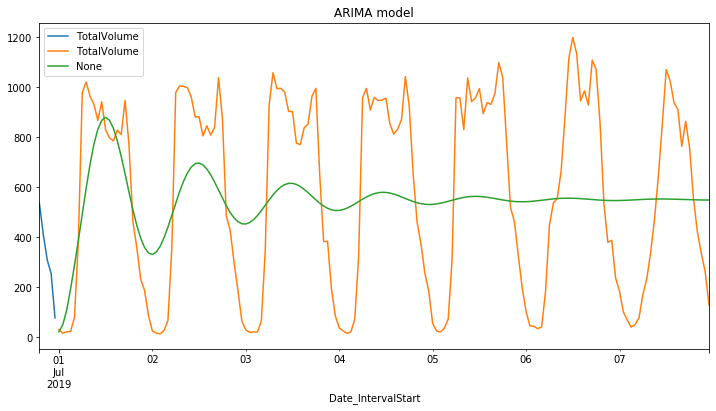

In [19]:
# Plot the results
preds.rename('Forecast')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
preds.iloc[:24 * 7].plot(legend=True,figsize=(12,6))
plt.title('ARIMA model')
plt.show()

### order = (7, 0)

In [193]:
mod_arma70 = ARMA(df['TotalVolume'], order=(7,0))
res_arma70 = mod_arma70.fit()

# Print out summary information on the fit
print(res_arma70.summary())

# Print out the estimate for the constant and for theta
print(res_arma70.params)

                              ARMA Model Results                              
Dep. Variable:            TotalVolume   No. Observations:                34896
Model:                     ARMA(7, 0)   Log Likelihood             -217964.148
Method:                       css-mle   S.D. of innovations            124.852
Date:                Thu, 26 Mar 2020   AIC                         435946.297
Time:                        15:22:29   BIC                         436022.438
Sample:                    07-08-2015   HQIC                        435970.553
                         - 06-30-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               549.0580      2.862    191.816      0.000     543.448     554.668
ar.L1.TotalVolume     1.3104      0.005    245.833      0.000       1.300       1.321
ar.L2.TotalVolume    -0.

In [194]:
predsarma70 = res_arma.predict(start=start, end=end, dynamic=False)

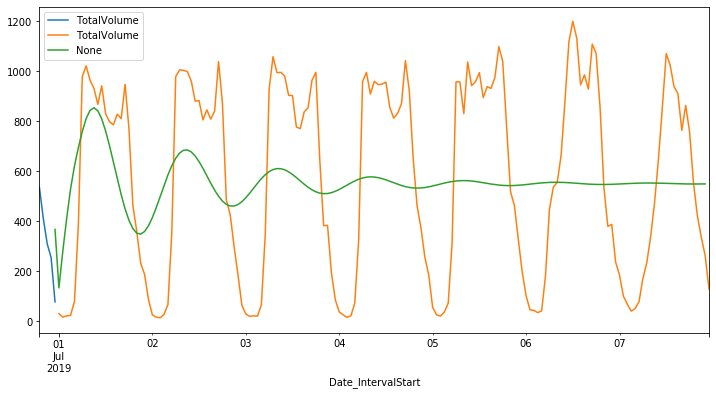

In [195]:
preds.rename('Forecast')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
predsarma70.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

### order = (24, 7)

In [196]:
mod_arma247 = ARMA(df['TotalVolume'], order=(24,7))
res_arma247 = mod_arma247.fit()

In [197]:
predsarma247 = res_arma.predict(start=start, end=end, dynamic=False)

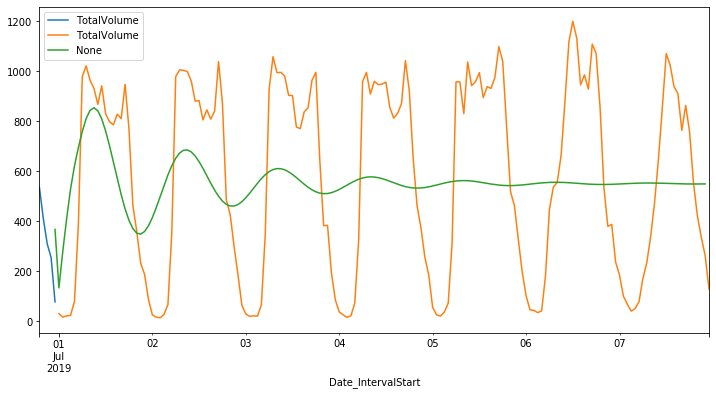

In [198]:
preds.rename('Forecast')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
predsarma247.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

## ARIMA

In [131]:
from statsmodels.tsa.arima_model import ARIMA

mod_arima = ARIMA(df['TotalVolume'], order=(24, 1, 0))
mod_arima_fit = mod_arima.fit(method='mle')


# Print out summary information on the fit
print(mod_arima_fit.summary())

# Print out the estimate for the constant and for theta
print(mod_arima_fit.params)

KeyboardInterrupt: 

In [407]:
start = df_test.index[0]
end = df_test.index[-1]

In [ ]:
start = df_test.index[0]
end = df_test.index[-1]
preds = mod_arima_fit.predict(start=start, end=end, dynamic=False)

In [ ]:
preds_sarimax = mod_sarimax_fit.predict(start=start, end=end, dynamic=False, typ='levels')
preds_sarimax.rename('SARIMAX predictions')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
preds_sarimax.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

### arima with exog

In [ ]:
marimae = ARIMA(df['TotalVolume'], order=(2,1,2))
marimae_fit = marimae.fit(method='mle')

## SARIMAX

In [214]:
mod_sarimax = sm.tsa.statespace.SARIMAX(df['TotalVolume'],
                                order=(2, 1, 2))#,
                                #seasonal_order=(1, 0, 1, 24 * 7),
                                #enforce_stationarity=False,
                                #enforce_invertibility=False)
mod_sarimax_fit = mod_sarimax.fit()
print(mod_sarimax_fit.summary())

                           Statespace Model Results                           
Dep. Variable:            TotalVolume   No. Observations:                34896
Model:               SARIMAX(2, 1, 2)   Log Likelihood             -218064.010
Date:                Thu, 26 Mar 2020   AIC                         436138.019
Time:                        16:04:05   BIC                         436180.320
Sample:                    07-08-2015   HQIC                        436151.495
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8857      0.002    855.567      0.000       1.881       1.890
ar.L2         -0.9562      0.002   -430.254      0.000      -0.961      -0.952
ma.L1         -1.9257      0.002   -911.264      0.0

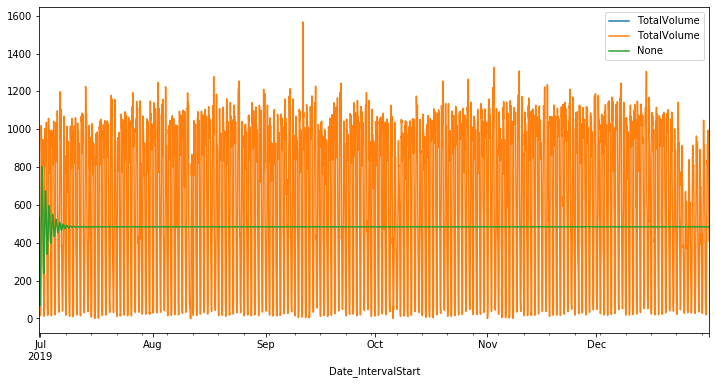

In [216]:
preds_sarimax = mod_sarimax_fit.predict(start=start, end=end, dynamic=False, typ='levels')
preds_sarimax.rename('SARIMAX predictions')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
preds_sarimax.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

In [224]:
mod_sarimax_seasonal = sm.tsa.statespace.SARIMAX(df['TotalVolume'],
                                order=(2, 1, 2),
                                seasonal_order=(2,1,2, 24 * 7),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
mod_sarimax_seasonal_fit = mod_sarimax.fit()
print(mod_sarimax_seasonal_fit.summary())

                           Statespace Model Results                           
Dep. Variable:            TotalVolume   No. Observations:                34896
Model:               SARIMAX(2, 1, 2)   Log Likelihood             -218064.010
Date:                Thu, 26 Mar 2020   AIC                         436138.019
Time:                        16:08:39   BIC                         436180.320
Sample:                    07-08-2015   HQIC                        436151.495
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8857      0.002    855.567      0.000       1.881       1.890
ar.L2         -0.9562      0.002   -430.254      0.000      -0.961      -0.952
ma.L1         -1.9257      0.002   -911.264      0.0

In [20]:
preds_sarimax_seasonal = mod_sarimax_seasonal_fit.predict(start=start, end=end, dynamic=False, typ='levels')
preds_sarimax_seasonal.rename('SARIMAX with season predictions')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
preds_sarimax_seasonal.iloc[:24 * 7].plot(legend=True,figsize=(12,6))
plt.title('SARIMAX model')
plt.show()

NameError: name 'mod_sarimax_seasonal_fit' is not defined

In [231]:
df

,TotalVolumetime_shift,TotalVolume,day_of_week,week_diff,year_diff,year_and_week_diff,week_and_2month_diff,ShiftDay,ShiftWeek,DiffWeek
Date_IntervalStart,,,,,,,,,,
2015-07-08 00:00:00,19.0,25,2,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08 01:00:00,16.0,16,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08 02:00:00,11.0,13,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08 03:00:00,12.0,15,2,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08 04:00:00,40.0,48,2,8.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-06-30 19:00:00,541.0,533,6,-8.0,-255.0,-247.0,-234.0,933.0,541.0,-8.0
2019-06-30 20:00:00,410.0,408,6,-2.0,-122.0,-120.0,-116.0,605.0,410.0,-2.0
2019-06-30 21:00:00,309.0,308,6,-1.0,-57.0,-56.0,-58.0,421.0,309.0,-1.0


In [347]:
mod_sarimax_seasonal_exog = sm.tsa.statespace.SARIMAX(df['TotalVolume'],
                                order=(2, 1, 2),
                                seasonal_order=(2,1,2, 24 * 7),
                                enforce_stationarity=True,
                                enforce_invertibility=False,
                                exog=df['week_diff'])
mod_sarimax_seasonal_exog_fit = mod_sarimax.fit()
print(mod_sarimax_seasonal_fit.summary())

                           Statespace Model Results                           
Dep. Variable:            TotalVolume   No. Observations:                34896
Model:               SARIMAX(2, 1, 2)   Log Likelihood             -218064.010
Date:                Thu, 26 Mar 2020   AIC                         436138.019
Time:                        20:13:49   BIC                         436180.320
Sample:                    07-08-2015   HQIC                        436151.495
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8857      0.002    855.567      0.000       1.881       1.890
ar.L2         -0.9562      0.002   -430.254      0.000      -0.961      -0.952
ma.L1         -1.9257      0.002   -911.264      0.0

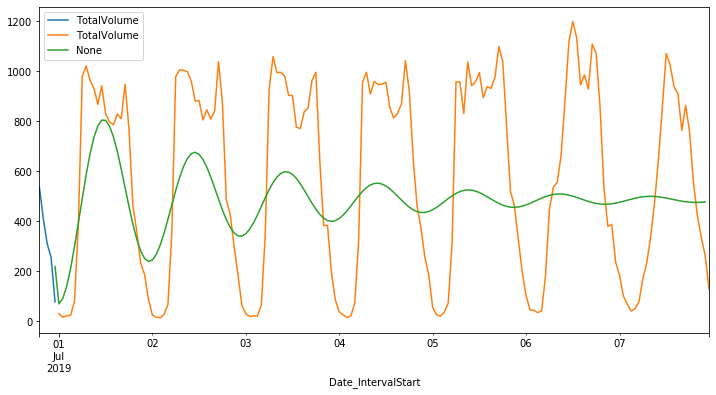

In [348]:
preds_sarimax_seasonal_exog = mod_sarimax_seasonal_exog_fit.predict(start=start, end=end, dynamic=False, typ='levels')
preds_sarimax_seasonal_exog.rename('SARIMAX with season predictions')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
preds_sarimax_seasonal.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

#### SARIMAX order from day

In [462]:
mdsarimax_day_params = sm.tsa.statespace.SARIMAX(df['TotalVolume'], 
                                                order=(2,1,2),
                                                seasonal_order=(1, 0, 1, 7),
                                                exog=df['isBusinessHour']
                                                )
mshdp = mdsarimax_day_params.fit()
print(mshdp.summary())

                                 Statespace Model Results                                
Dep. Variable:                       TotalVolume   No. Observations:                34896
Model:             SARIMAX(2, 1, 2)x(1, 0, 1, 7)   Log Likelihood             -214344.346
Date:                           Thu, 26 Mar 2020   AIC                         428704.693
Time:                                   21:40:28   BIC                         428772.374
Sample:                               07-08-2015   HQIC                        428726.254
                                    - 06-30-2019                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
isBusinessHour   345.4213      1.506    229.298      0.000     342.469     348.374
ar.L1              0.7282      

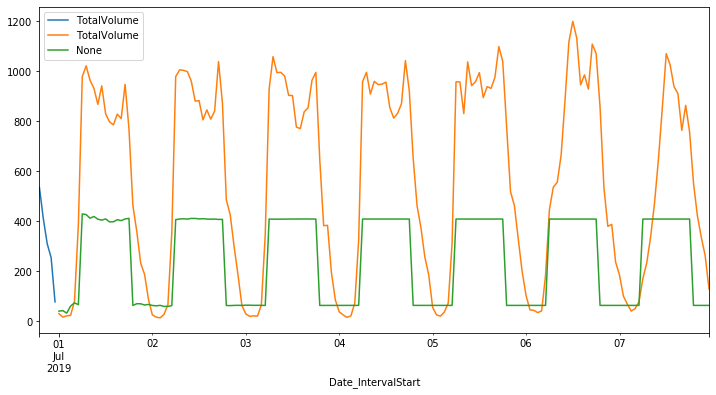

In [463]:
df_test_hour_shaped = np.array(df_test['isBusinessHour']).reshape(4416,1)
preds_mshdp = mshdp.predict(start=start, end=end, dynamic=False, typ='levels', exog=df_test_hour_shaped)
preds_mshdp.rename('SARIMAX 212 X 1017')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
preds_mshdp.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

In [464]:
mdsarimax_day_params1 = sm.tsa.statespace.SARIMAX(df['TotalVolume'], 
                                                order=(2,1,2),
                                                exog=df['isBusinessHour']
                                                )
mshdp1 = mdsarimax_day_params1.fit()
print(mshdp1.summary())

                           Statespace Model Results                           
Dep. Variable:            TotalVolume   No. Observations:                34896
Model:               SARIMAX(2, 1, 2)   Log Likelihood             -211120.231
Date:                Thu, 26 Mar 2020   AIC                         422252.462
Time:                        21:48:57   BIC                         422303.223
Sample:                    07-08-2015   HQIC                        422268.633
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
isBusinessHour   264.1475      1.566    168.647      0.000     261.078     267.217
ar.L1              1.8699      0.002    763.003      0.000       1.865       1.875
ar.L2             -0.9418      0.002

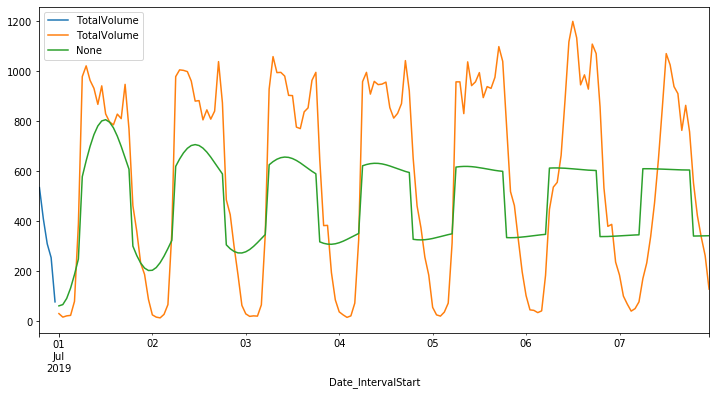

In [465]:
df_test_hour_shaped = np.array(df_test['isBusinessHour']).reshape(4416,1)
preds_mshdp1 = mshdp1.predict(start=start, end=end, dynamic=False, typ='levels', exog=df_test_hour_shaped)
preds_mshdp1.rename('SARIMAX 212 X 1017')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
preds_mshdp1.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

In [471]:
#SARIMAX(3, 1, 3)x(0, 0, 1, 7)
mdsarimax_day_params2 = sm.tsa.statespace.SARIMAX(df['TotalVolume'], 
                                                order=(3,1,3),
                                                seasonal_order=(0,0,1,7),
                                                exog=df['isBusinessHour']
                                                )
mshdp2 = mdsarimax_day_params2.fit()
print(mshdp2.summary())

                                 Statespace Model Results                                
Dep. Variable:                       TotalVolume   No. Observations:                34896
Model:             SARIMAX(3, 1, 3)x(0, 0, 1, 7)   Log Likelihood             -210712.986
Date:                           Thu, 26 Mar 2020   AIC                         421443.972
Time:                                   22:24:33   BIC                         421520.112
Sample:                               07-08-2015   HQIC                        421468.228
                                    - 06-30-2019                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
isBusinessHour   351.2125      1.874    187.445      0.000     347.540     354.885
ar.L1              0.8549      

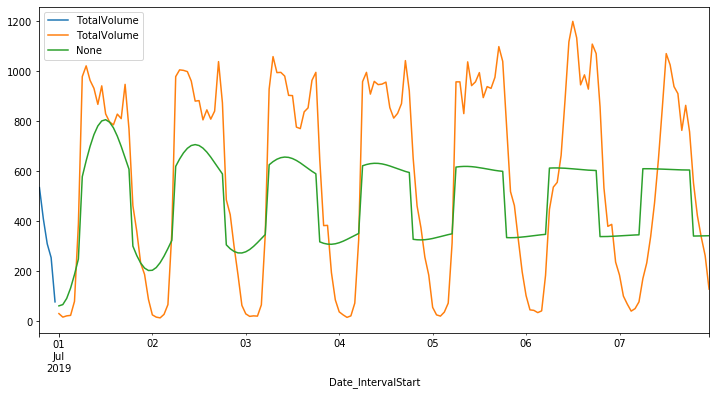

In [472]:
df_test_hour_shaped = np.array(df_test['isBusinessHour']).reshape(4416,1)
preds_mshdp2 = mshdp2.predict(start=start, end=end, dynamic=False, typ='levels', exog=df_test_hour_shaped)
preds_mshdp2.rename('SARIMAX 313 X 0017 w Exog')
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
preds_mshdp1.iloc[:24 * 7].plot(legend=True,figsize=(12,6));

In [441]:
np.array(df_test['hour']).reshape(4416,1)

array([[ 0],
       [ 1],
       [ 2],
       ...,
       [21],
       [22],
       [23]])

### diff prediction

In [317]:
modsarimaxdiff = sm.tsa.statespace.SARIMAX(df['week_diff'],
                                order=(2, 1, 2),
                                enforce_stationarity=False,#exog=df['day_of_week']
                                enforce_invertibility=False)
msdf = modsarimaxdiff.fit()
print(msdf.summary())

                           Statespace Model Results                           
Dep. Variable:              week_diff   No. Observations:                34896
Model:               SARIMAX(2, 1, 2)   Log Likelihood             -200869.755
Date:                Thu, 26 Mar 2020   AIC                         401749.510
Time:                        20:02:10   BIC                         401791.810
Sample:                    07-08-2015   HQIC                        401762.986
                         - 06-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2890      0.139      2.084      0.037       0.017       0.561
ar.L2          0.2270      0.085      2.659      0.008       0.060       0.394
ma.L1         -0.6596      0.139     -4.751      0.0

In [340]:
len(cumul[:-2])

4416

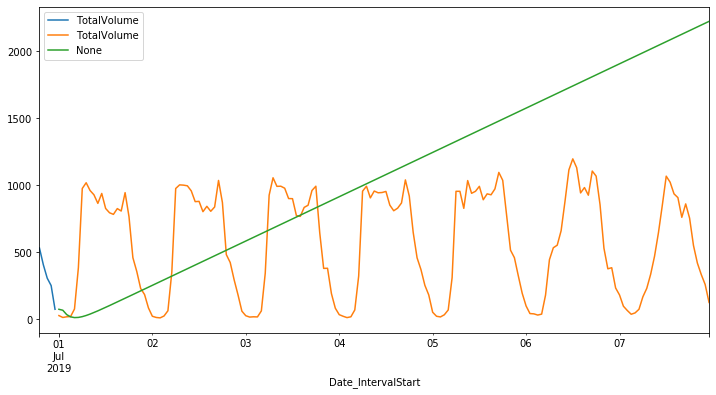

In [342]:
preds_msdf = msdf.predict(start=df['week_diff'].index[-1], end=df_test['TotalVolume'].index[-1], dynamic=False, typ='levels')
preds_msdf.rename('SARIMAX diff predictions')
x, x_diff = df['TotalVolume'][-1:], preds_msdf
cumul = np.r_[x, x_diff].cumsum().astype(float)
cumseries = pd.Series(cumul[:-2], index=df_test.index)
df['TotalVolume'].iloc[-5:].plot(legend=True)
df_test['TotalVolume'].iloc[:24 * 7].plot(legend=True)
cumseries[:168].plot(legend=True,figsize=(12,6));


In [318]:
df['week_diff'].index[-1]

Timestamp('2019-06-30 23:00:00')

In [322]:
df_test['TotalVolume'][-1:]

Date_IntervalStart
2019-12-31 23:00:00    410
Name: TotalVolume, dtype: int64

# Auto-Arima

In [240]:
24 * 7

168

In [ ]:
#8736 hours in a year

In [243]:

auto = auto_arima(df['TotalVolume'].iloc[8736:],seasonal=False,m=168).summary()

In [244]:
auto

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                26160
Model:               SARIMAX(2, 1, 2)   Log Likelihood             -163148.072
Date:                Thu, 26 Mar 2020   AIC                         326308.144
Time:                        19:09:02   BIC                         326357.176
Sample:                             0   HQIC                        326323.980
                              - 26160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.002e-05      0.011     -0.005      0.996      -0.022       0.022
ar.L1          1.8879      0.003    676.596      0.000       1.882       1.893
ar.L2         -0.9582      0.003   -340.591      0.000      -0.964      -0.953
ma.L1         -1.9270      0.002   -799.730      0.000      -1.932      -1.922
ma.L2          0.9375      0.002    390.799      0.000       0.933       0.942
sigma2       1.53e+04    121.120    126.307      0.000    1.51e+04    1.55e+04
===================================================================================
Ljung-Box (Q):                    21541.33   Jarque-Bera (JB):             20682.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             1.32
Prob(H) (two-sided):                  0.47   Kurtosis:                         6.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [213]:
auto

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                34896
Model:               SARIMAX(2, 1, 2)   Log Likelihood             -218064.604
Date:                Thu, 26 Mar 2020   AIC                         436141.208
Time:                        16:00:53   BIC                         436191.968
Sample:                             0   HQIC                        436157.379
                              - 34896                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0028      0.010     -0.279      0.780      -0.022       0.017
ar.L1          1.8852      0.003    751.931      0.000       1.880       1.890
ar.L2         -0.9556      0.003   -378.379      0.000      -0.961      -0.951
ma.L1         -1.9255      0.002   -913.388      0.000      -1.930      -1.921
ma.L2          0.9364      0.002    446.680      0.000       0.932       0.941
sigma2      1.557e+04    107.393    144.984      0.000    1.54e+04    1.58e+04
===================================================================================
Ljung-Box (Q):                    29164.16   Jarque-Bera (JB):             27151.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [382]:
auto_day = auto_arima(df_days['TotalVolume'],seasonal=True,m=7)

In [383]:
auto_day.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1454
Model:             SARIMAX(2, 1, 2)x(1, 0, 1, 7)   Log Likelihood              -12111.396
Date:                           Thu, 26 Mar 2020   AIC                          24238.791
Time:                                   20:42:20   BIC                          24281.042
Sample:                                        0   HQIC                         24254.557
                                          - 1454                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0049      0.009      0.525      0.600      -0.014       0.023
ar.L1         -0.7710      0.057    -13.593      0.000      -0.882      -0.660
ar.L2          0.2289      0.049      4.653      0.000       0.132       0.325
ma.L1          0.2722      0.056      4.891      0.000       0.163       0.381
ma.L2         -0.7273      0.051    -14.210      0.000      -0.828      -0.627
ar.S.L7        1.0000   4.23e-05   2.37e+04      0.000       1.000       1.000
ma.S.L7       -0.9914      0.006   -172.085      0.000      -1.003      -0.980
sigma2      1.422e+06   1.44e-07   9.89e+12      0.000    1.42e+06    1.42e+06
===================================================================================
Ljung-Box (Q):                      115.26   Jarque-Bera (JB):             18150.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -2.74
Prob(H) (two-sided):                  0.38   Kurtosis:                        19.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.42e+27. Standard errors may be unstable.
"""

In [467]:
df.shape

(34896, 12)

In [468]:
exg = np.array(df['isBusinessHour']).reshape(df.shape[0],1)
autoexog = auto_arima(df['TotalVolume'], seasonal=True, m=7, exogenous=exg)

In [469]:
autoexog.summary() #SARIMAX(3, 1, 3)x(0, 0, 1, 7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                34896
Model:             SARIMAX(3, 1, 3)x(0, 0, 1, 7)   Log Likelihood             -210734.985
Date:                           Thu, 26 Mar 2020   AIC                         421489.971
Time:                                   22:21:02   BIC                         421574.572
Sample:                                        0   HQIC                        421516.922
                                         - 34896                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0420      0.015     -2.839      0.005      -0.071      -0.013
x1           351.3244      1.966    178.713      0.000     347.471     355.177
ar.L1          0.8579      0.003    287.436      0.000       0.852       0.864
ar.L2          0.9293      0.001   1107.814      0.000       0.928       0.931
ar.L3         -0.9281      0.003   -309.747      0.000      -0.934      -0.922
ma.L1         -0.9039      0.003   -308.291      0.000      -0.910      -0.898
ma.L2         -0.9864      0.001   -887.750      0.000      -0.989      -0.984
ma.L3          0.9120      0.003    310.830      0.000       0.906       0.918
ma.S.L7       -0.0142      0.007     -1.984      0.047      -0.028      -0.000
sigma2      1.153e+04     80.253    143.708      0.000    1.14e+04    1.17e+04
===================================================================================
Ljung-Box (Q):                    20601.24   Jarque-Bera (JB):              4018.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# RMSE Comparison

In [209]:
predmnolag.iloc[1:]

2019-07-01 00:00:00     15.177725
2019-07-01 01:00:00     16.016650
2019-07-01 02:00:00     40.191866
2019-07-01 03:00:00     46.910572
2019-07-01 04:00:00     45.444644
                          ...    
2019-12-31 19:00:00    548.901157
2019-12-31 20:00:00    548.603246
2019-12-31 21:00:00    548.324111
2019-12-31 22:00:00    548.082704
2019-12-31 23:00:00    547.895351
Freq: H, Name: nolag, Length: 4416, dtype: float64

In [206]:
df_test['TotalVolume']

Date_IntervalStart
2019-07-01 00:00:00     29
2019-07-01 01:00:00     15
2019-07-01 02:00:00     20
2019-07-01 03:00:00     22
2019-07-01 04:00:00     78
                      ... 
2019-12-31 19:00:00    853
2019-12-31 20:00:00    691
2019-12-31 21:00:00    594
2019-12-31 22:00:00    528
2019-12-31 23:00:00    410
Name: TotalVolume, Length: 4416, dtype: int64

In [204]:
len(df_test['TotalVolume']), len(predmnolag)

(4416, 4417)

In [2]:
58524.534 *( 1/2)

29262.267

In [239]:
from sklearn.metrics import mean_squared_error

labels = ['ARnolag', 'AR','ARMA','SARIMAX', 'SARIMAX_SEASONAL', 'SARIMAX']
preds_list = [predmnolag[:24 * 21], predar1[:24 * 21], preds[:24 * 21], preds_sarimax[:24 * 21], preds_sarimax_seasonal[:24 * 21], None]  # these are variables, not strings!

for i in range(len(preds_list)):
    error = mean_squared_error(df_test['TotalVolume'].iloc[:24 * 21], preds_list[i])
    print(f'{labels[i]} Error: {error:11.10}')

ARnolag Error: 68322.47476
AR Error:   58524.534
ARMA Error: 144629.2036
SARIMAX Error: 150113.7128
SARIMAX_SEASONAL Error: 150113.7128


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [121]:
labels = ['ar1', 'arma', 'arima', 'sarimax']
modls = [AR1fit]

for i in range(len(modls)):
    print(f'{labels[i]} AIC: {modls[i].rmse:6.5}')

NameError: name 'AR2fit' is not defined

# Convert Back

In [269]:
predar2

2019-07-01 00:00:00   -43.366306
2019-07-01 01:00:00   -20.317396
2019-07-01 02:00:00   -14.933896
2019-07-01 03:00:00    -4.665760
2019-07-01 04:00:00     0.177505
                         ...    
2019-12-31 19:00:00     0.500202
2019-12-31 20:00:00     0.500202
2019-12-31 21:00:00     0.500202
2019-12-31 22:00:00     0.500202
2019-12-31 23:00:00     0.500202
Freq: H, Name: PredictionAR2, Length: 4416, dtype: float64

In [264]:
last = df['TotalVolume'][-8:]
for y in predar2:
    n = last + y
    

SyntaxError: unexpected EOF while parsing (<ipython-input-264-27bf92191625>, line 4)

In [270]:

df['TotalVolume'][-1:]

x, x_diff = df['TotalVolume'][-1:], predar2
cumul = np.r_[x, x_diff].cumsum().astype(float)



In [268]:
df['TotalVolume'][-1:]

Date_IntervalStart
2019-06-30 23:00:00    76
Name: TotalVolume, dtype: int64

# Models By Day

## AR

In [360]:
df_days_test = df_test.resample('d').sum()

In [361]:
df_days_test

,TotalVolume,week_timeshift,DiffWeek
Date_IntervalStart,,,
2019-07-01,13324,0.0,0.0
2019-07-02,13849,0.0,0.0
2019-07-03,14121,0.0,0.0
2019-07-04,14396,0.0,0.0
2019-07-05,15327,0.0,0.0
...,...,...,...
2019-12-27,12267,16824.0,-4557.0
2019-12-28,12004,14558.0,-2554.0
2019-12-29,10151,11310.0,-1159.0


In [363]:
startd = df_days_test.index[0]
endd = df_days_test.index[-1]

In [364]:
modeldayar = AR(df_days['TotalVolume'])
mdaysar = modeldayar.fit(method='mle', ic='aic')
predsdaysar = mdaysar.predict(start=startd, end=endd, dynamic=False).rename('Basic AR Day')

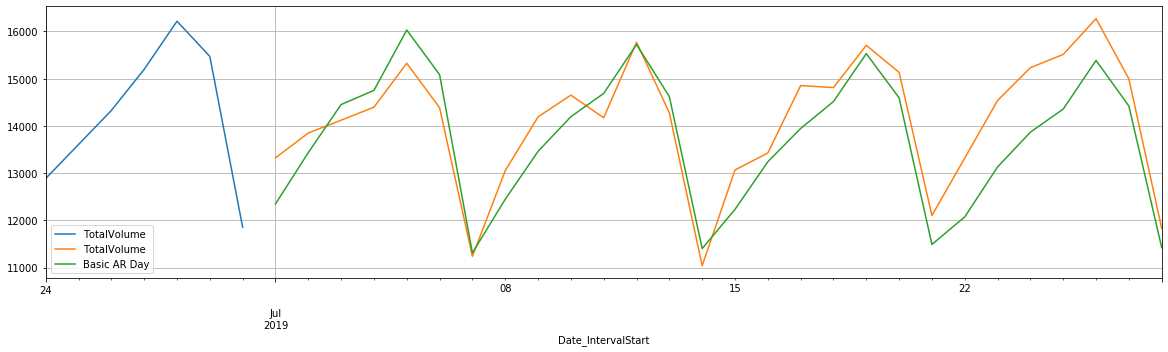

In [379]:
df_days['TotalVolume'].iloc[-7:].plot(legend=True)
df_days_test['TotalVolume'].iloc[:28].plot(legend=True)
predsdaysar.iloc[:28].plot(legend=True, grid=True)

## SARIMAX

In [ ]:
#SARIMAX(2, 1, 2)x(1, 0, 1, 7)


In [386]:
msarimaxdays = sm.tsa.statespace.SARIMAX(df_days['TotalVolume'],
                                order=(2, 1, 2),
                                seasonal_order=(1, 0, 1, 7))#,
                                #enforce_stationarity=False,
                                #enforce_invertibility=False)
mod_sarimax_days_fit = msarimaxdays.fit()
print(mod_sarimax_days_fit.summary())

                                 Statespace Model Results                                
Dep. Variable:                       TotalVolume   No. Observations:                 1454
Model:             SARIMAX(2, 1, 2)x(1, 0, 1, 7)   Log Likelihood              -12049.590
Date:                           Thu, 26 Mar 2020   AIC                          24113.181
Time:                                   20:44:49   BIC                          24150.151
Sample:                               07-08-2015   HQIC                         24126.975
                                    - 06-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6993      0.073     -9.517      0.000      -0.843      -0.555
ar.L2          0.2997      0.032      9.275

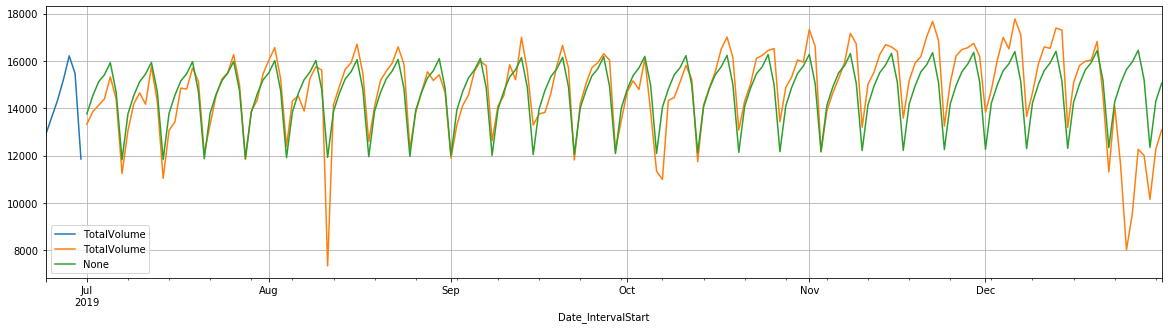

In [401]:
preds_sarimax_days = mod_sarimax_days_fit.predict(start=startd, end=endd, dynamic=False, typ='levels')
preds_sarimax_days.rename('SARIMAX predictions')
df_days['TotalVolume'].iloc[-7:].plot(legend=True)
df_days_test['TotalVolume'].plot(legend=True)
preds_sarimax_days.plot(legend=True,grid=True);

In [353]:
df_days

,TotalVolumetime_shift,TotalVolume,day_of_week,week_diff,year_diff,year_and_week_diff,week_and_2month_diff,ShiftDay,ShiftWeek,DiffWeek
Date_IntervalStart,,,,,,,,,,
2015-07-08,12645.0,12097,48,-548.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-09,13138.0,12970,72,-168.0,0.0,0.0,0.0,12097.0,0.0,0.0
2015-07-10,13692.0,13109,96,-583.0,0.0,0.0,0.0,12970.0,0.0,0.0
2015-07-11,10937.0,11179,120,242.0,0.0,0.0,0.0,13109.0,0.0,0.0
2015-07-12,8486.0,8104,144,-382.0,0.0,0.0,0.0,11179.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2019-06-26,14986.0,14327,48,-659.0,119.0,778.0,636.0,13606.0,14986.0,-659.0
2019-06-27,14993.0,15197,72,204.0,1098.0,894.0,3305.0,14327.0,14993.0,204.0
2019-06-28,16323.0,16217,96,-106.0,2167.0,2273.0,2521.0,15197.0,16323.0,-106.0


# RMSE DAYS Comparison

In [378]:
#average daily traffic
#mean = 13177
#std = 1979
#min = 5841
#max = 16684
df_days.describe()

,TotalVolumetime_shift,TotalVolume,day_of_week,week_diff,year_diff,year_and_week_diff,week_and_2month_diff,ShiftDay,ShiftWeek,DiffWeek
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,13165.396836,13177.392710,72.082531,11.995873,492.575653,480.215268,90.326685,13169.239340,13108.919532,12.756534
std,1981.623598,1979.781569,47.995799,1395.224819,1637.126859,1808.404049,2858.355208,2009.420816,2176.305301,1394.964656
min,5841.000000,5841.000000,0.000000,-9005.000000,-7432.000000,-7517.000000,-9220.000000,0.000000,0.000000,-9005.000000
25%,12249.500000,12258.500000,24.000000,-387.250000,0.000000,0.000000,-1734.250000,12258.500000,12212.000000,-383.000000
50%,13446.500000,13459.500000,72.000000,57.500000,254.000000,80.000000,-25.500000,13459.500000,13436.500000,53.500000
75%,14594.000000,14625.000000,120.000000,490.250000,1335.000000,1400.250000,2052.250000,14625.000000,14594.000000,490.250000
max,16684.000000,16684.000000,144.000000,7798.000000,7539.000000,8395.000000,9280.000000,16684.000000,16684.000000,7798.000000


In [402]:
#four week comparison
proj = len(df_days_test['TotalVolume'].index)
labels = ['AR', 'SARIMAX']
preds_list = [predsdaysar[:proj], preds_sarimax_days[:proj]]
for i in range(len(preds_list)):
    error = mean_squared_error(df_days_test['TotalVolume'].iloc[:proj], preds_list[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR Error: 4111716.462
SARIMAX Error: 1517624.712


In [399]:
349613.276 <495298.0901 , 336110.7308

True

In [3]:
1517624.712 ** (1/2)

1231.9191174748446

,TotalVolume,week_timeshift,DiffWeek
Date_IntervalStart,,,
2019-07-01,13324,0.0,0.0
2019-07-02,13849,0.0,0.0
2019-07-03,14121,0.0,0.0
2019-07-04,14396,0.0,0.0
2019-07-05,15327,0.0,0.0
...,...,...,...
2019-12-27,12267,16824.0,-4557.0
2019-12-28,12004,14558.0,-2554.0
2019-12-29,10151,11310.0,-1159.0


In [405]:
184 / 24

7.666666666666667

# Drop Nights